<a href="https://colab.research.google.com/github/Colette-c/MAT-422/blob/main/HW_3_5%2C_3_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-means

The objective of k-means clustering is to split the $n$ observations into $k(<n)$ sets $S={S_1,...,S_k}$ minimizing the within cluster sum of squares(WCSS): $$\text{arg min}_S\sum_{i=1}^k{WCSS_i}$$

The squared distance of each vector from its centroid summed over all vectors: $$WCSS_i=\sum_{x\in S_i}{||x-\mu (S_i)||^2},$$ where $\mu(S_i)$ is the mean of points in $S_i$, $$\mu(S)=\frac{1}{|S|}\sum_{x\in S}{x}$$

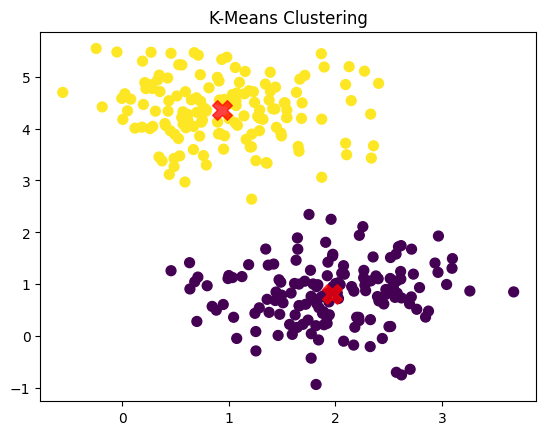

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

## Generate synthetic data with 3 clusters
x, y = make_blobs(n_samples=300, centers=2, cluster_std=0.6, random_state=0)

## Perform K-means clustering
kmeans = KMeans(n_clusters=2)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)

## Plot the clusters and the kmeans centers
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, s=50)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("K-Means Clustering")
plt.show()


# Support Vector Machine

**Support-vector machines** are supervised learning models in machine learning, which aim to analyze data for classification and regression analysis.

A hyperplane can be written as the set of points $\mathbf{x}$ satisfying $\mathbf{w}^T\mathbf{x}-b=0$ where $\mathbf{w}$ is the normal vector to the hyperplane.

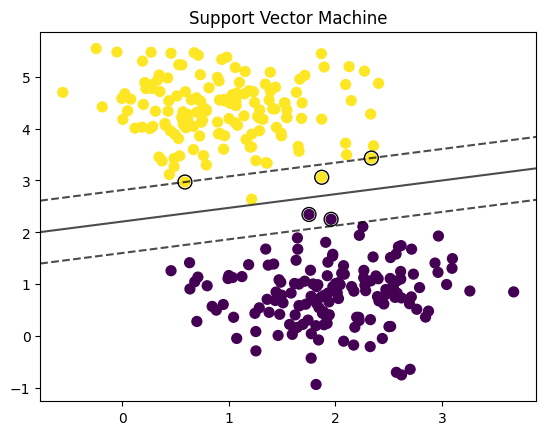

In [22]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

## Create training and test sets using the dataset from the kmeans
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

## SVM classification
svm_model = SVC(kernel='linear')
svm_model.fit(x_train, y_train)

## make scatter plot
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, s=50)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create a grid
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm_model.decision_function(xy).reshape(XX.shape)

## Plot hyperplane and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.7,
           linestyles=['--', '-', '--'])

# Plot support vectors
ax.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.title("Support Vector Machine")
plt.show()
